<a href="https://colab.research.google.com/github/axelpuyo/liasd/blob/master/perceptive_bias_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Run once
!pip install import-ipynb

import os
from google.colab import drive
print(os.getcwd())
print(os.listdir())

#%cd your_path/Colab Notebooks
%cd drive/MyDrive/Colab Notebooks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content
['.config', 'drive', 'sample_data']
/content/drive/MyDrive/Colab Notebooks


importing Jupyter notebook from colored_mnist.ipynb


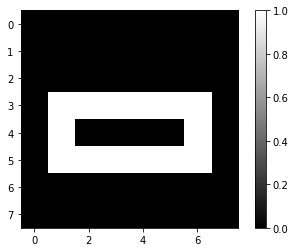

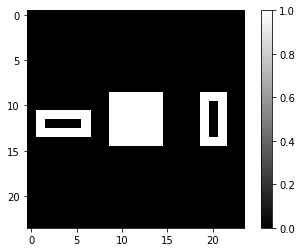

In [2]:
import numpy as np
import random as rd
import import_ipynb
import colored_mnist
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
(train_images, train_colors, train_numbers, train_mixed), (test_images, test_colors, test_numbers, test_mixed) = colored_mnist.load_data(8000)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# Color-biased model
color_model = keras.Sequential()
color_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
color_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
color_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
color_model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
color_model.add(keras.layers.Flatten())
color_model.add(keras.layers.Dense(3))
color_model.add(keras.layers.Softmax())

input_shape = train_images.shape
color_model.build(input_shape)

color_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# color_model.summary()

print('>> Color-biased model training')
color_model.fit(train_images, train_colors, batch_size=12, epochs=25)

>> Color-biased model training
Epoch 1/25
667/667 [==============================] - 15s 4ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 2/25
667/667 [==============================] - 2s 3ms/step - loss: 5.9605e-10 - accuracy: 1.0000
Epoch 3/25
667/667 [==============================] - 2s 4ms/step - loss: 2.2352e-10 - accuracy: 1.0000
Epoch 4/25
667/667 [==============================] - 2s 4ms/step - loss: 1.1921e-10 - accuracy: 1.0000
Epoch 5/25
667/667 [==============================] - 2s 4ms/step - loss: 8.9407e-11 - accuracy: 1.0000
Epoch 6/25
667/667 [==============================] - 2s 4ms/step - loss: 8.9407e-11 - accuracy: 1.0000
Epoch 7/25
667/667 [==============================] - 2s 4ms/step - loss: 4.4703e-11 - accuracy: 1.0000
Epoch 8/25
667/667 [==============================] - 2s 4ms/step - loss: 2.9802e-11 - accuracy: 1.0000
Epoch 9/25
667/667 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/25
667/667 [===============

In [5]:
# Shape-biased model
shape_model = keras.Sequential()
shape_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
shape_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
shape_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
shape_model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
shape_model.add(keras.layers.Flatten())
shape_model.add(keras.layers.Dense(10))
shape_model.add(keras.layers.Softmax())

input_shape = train_images.shape
shape_model.build(input_shape)

shape_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# shape_model.summary()

print('>> Shape-biased model training')
shape_model.fit(train_images, train_numbers, batch_size=12, epochs=25, shuffle=True)

>> Shape-biased model training
Epoch 1/25
667/667 [==============================] - 3s 3ms/step - loss: 0.4054 - accuracy: 0.8719
Epoch 2/25
667/667 [==============================] - 2s 3ms/step - loss: 0.1492 - accuracy: 0.9560
Epoch 3/25
667/667 [==============================] - 2s 3ms/step - loss: 0.1008 - accuracy: 0.9712
Epoch 4/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0761 - accuracy: 0.9778
Epoch 5/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0592 - accuracy: 0.9830
Epoch 6/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0508 - accuracy: 0.9874
Epoch 7/25
667/667 [==============================] - 2s 4ms/step - loss: 0.0407 - accuracy: 0.9894
Epoch 8/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0343 - accuracy: 0.9909
Epoch 9/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0278 - accuracy: 0.9935
Epoch 10/25
667/667 [==============================] - 2s 3ms/step - 

In [6]:
# Rule-biased model
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(13))
model.add(keras.layers.Softmax())

input_shape = train_images.shape
model.build(input_shape)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

print('>> Rule-biased model training')
model.fit(train_images, train_mixed, batch_size=12, epochs=25)

model.save(path)

>> Rule-biased model training
Epoch 1/25
667/667 [==============================] - 3s 3ms/step - loss: 0.2948 - accuracy: 0.9054
Epoch 2/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0986 - accuracy: 0.9712
Epoch 3/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0705 - accuracy: 0.9793
Epoch 4/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0516 - accuracy: 0.9855
Epoch 5/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0401 - accuracy: 0.9874
Epoch 6/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0360 - accuracy: 0.9887
Epoch 7/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0278 - accuracy: 0.9937
Epoch 8/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0186 - accuracy: 0.9944
Epoch 9/25
667/667 [==============================] - 2s 3ms/step - loss: 0.0186 - accuracy: 0.9955
Epoch 10/25
667/667 [==============================] - 2s 3ms/step - l

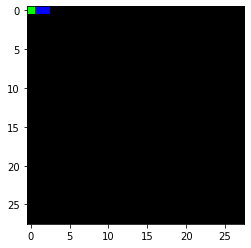

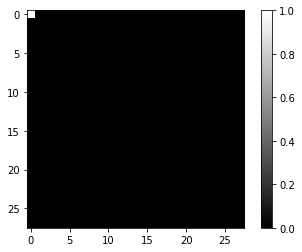

>> Color


array([[0.04244173, 0.83349437, 0.12406392]], dtype=float32)

In [92]:
# red_image = np.random.rand(1,28,28,3)
# red_image[..., 1] = red_image[..., 2] = 0
# plt.imshow(np.squeeze(red_image))
# plt.axis('off')
# plt.show()

# model.predict(red_image)

color_im = np.zeros((1,28,28,3))
color_im[0, 0, 0, 1] = 1
color_im[0, 0, 1:3, 2] = 1
# color_im[0, 5:12, 14:24, 2] = 1
# color_im[0, 13:24, 3:14, 2] = 1
plt.imshow(np.squeeze(color_im))
plt.show()
plt.imshow(np.squeeze(color_im[..., 1]), cmap='gray')
plt.colorbar()
plt.show()

print('>> Color')
color_model.predict(color_im)
# print('>> Shape')
# shape_model.predict(color_im)
# print('>> Normal')
# model.predict(color_im)

## Grad-CAM+CHAP pour voir si ca s'allume autour ou au niveau du chiffre

# plt.imshow(np.squeeze(train_images[0]))
# plt.axis('off')
# plt.show()

# new_im = np.zeros((1,28,28,3))
# new_im[..., 2] = (1 - train_images[0, ..., 0])
# new_im[..., 1] = train_images[0, ..., 0]
# plt.imshow(np.squeeze(new_im)[..., 2], cmap='gray')
# plt.colorbar()
# plt.show()

# model.predict(new_im)

In [ ]:
## CONFUSIONS
ims, labels = test_images, test_mixed
labs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'r', 'g', 'b']

n = 20
wrong_list = []
test_ims = ims[:n]
preds = model.predict(test_ims)
for i in range(test_ims.shape[0]):
  pred_max = max(preds[i]) # preds and ground are categorical, we must extract the number corresponding to the max value in the array.
  ground_max = max(labels[i])
  pred_value = list(preds[i]).index(pred_max)
  ground_value = list(labels[i]).index(ground_max)

  print('predicted value: ', labs[pred_value] , '  ground truth: ', labs[ground_value])

  if pred_value != ground_value:
    print(pred_value, ground_value)
    wrong_list.append((i, pred_value))

In [ ]:
c, plots = 1, 1
print('>> Wrongly classified : ', len(wrong_list), '/', test_ims.shape[0])
plt.suptitle('prediction vs. label', y=0.7)
labs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'red', 'green', 'blue']
for (i, j) in wrong_list:
  ground_truth = list(test_numbers[i]) #is the ground truth categorical. How do I get the number ? 
  max_val = max(ground_truth)
  true_label = ground_truth.index(max_val)
  pred_label = labs[j]

  if plots and wrong_list:
    plt.subplot(1, len(wrong_list), c)
    plt.title('{} / {}'.format(pred_label, true_label))
    plt.imshow(test_ims[i])
    plt.axis('off')
  c += 1

In [ ]:
## POST-ANALYSIS
if wrong_list:
  rgb_confusion = np.zeros((3,))
  for (i, j) in wrong_list: # i : index of wrongly classified image in the test dataset, # j : predicted label of that image.
    im = test_ims[i]
    for k in range(3):
      if im[..., k].any():
        rgb_confusion[k] += 1

  rgb_confusion /= len(wrong_list)
  pie_labels = ['red', 'green', 'blue']
  plt.pie(rgb_confusion, labels = pie_labels, colors = pie_labels, autopct='%1.1f%%')
  plt.title('is misclassification linked to color?')
  plt.show()

In [ ]:
## REPRESENTATIONAL SIMILARITY ANALYSIS
from keras.models import Model

# del f_map
models = [color_model, shape_model, model]
model_names = ['Color-biased model', 'Shape-biased model', 'Rule-biased model']
im = train_images[0]
if im.ndim < 4:
  im = np.expand_dims(im, axis=0)

f_map = [[],[],[]]
for (n, model) in enumerate(models):
  print(model_names[n])
  for i in range(len(model.layers)):
    if 'conv' not in model.layers[i].name:
      continue
    model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)

    kernels, biases = model.layers[i].get_weights()
    k_min, k_max = kernels.min(), kernels.max()
    kernels = (kernels - k_min) / (k_max - k_min)
    feature_map = model2.predict(im)

    # f_map = np.squeeze(feature_map[..., 0])
    # kernel = np.squeeze(kernels[..., 0, 0]) # Ce zéro est suspect, on ne sait pas si ce feature map vient forcément du 1er input du convolutional layer d'avant.

    # print(model.layers[i].name, kernels.shape)
    # plt.figure(figsize=(20,5))
    # plt.subplot(131)
    # plt.imshow(np.squeeze(im), aspect='auto')
    # plt.colorbar()
    # plt.subplot(132)
    # plt.imshow(kernel, aspect='auto')
    # plt.colorbar()
    # plt.subplot(133)
    # plt.imshow(f_map, aspect='auto')
    # plt.colorbar()
    # plt.show()
    # Visualize all feature maps and corresponding filters.
    num_maps = feature_map.shape[-1]
    rows = int(np.floor(np.sqrt(num_maps)))
    idx = 1
    # plt.figure(figsize=(20, 10))
    print(model.layers[i].name, kernels.shape)
    for j in range(0, num_maps, 8):
      # print(num_maps, idx, rows*2*rows)
      f_map[n].append(np.squeeze(feature_map[..., j]))
      kernel = np.squeeze(kernels[..., 0, j]) # Ce zéro est suspect : revoir les shape des kernels.

      if n == 2:
        print(np.array(f_map).shape)
        print('color_bias : ', np.corrcoef(f_map[0][-1], f_map[2][-1]))
        print('shape_bias : ', np.corrcoef(f_map[1][-1], f_map[2][-1]))
      # plt.subplot(2, 8, idx)
      # plt.imshow(kernel, aspect='auto')
      # plt.subplot(2, 8, idx + 1)
      # plt.imshow(f_map, aspect='auto')

      idx += 2
    # plt.show()
  pass # use feature map analysis code developed last week